### What is Feature Scaling?<br>
Feature scaling is a techniqueto standardize the independent features present in the data in a fixed range. To jo aapka data h, suppose IQ or say salary, that may vary through out our dataset, so unko "compres" karke 1 range me lekar aana. <br>

### Why do we need Feature scaling?
say you want to build a classifies and check if a person will buy a particular commodity based on the salary and age or not, in 
that case if the values of salaries are not scaled, our model of choice (CNN) ache se kaam nahi kar payega.<br>
Beacuse while applying any algorithm like cnn, then there can be a difference in the values of independent variables, so they shall all be scaled!
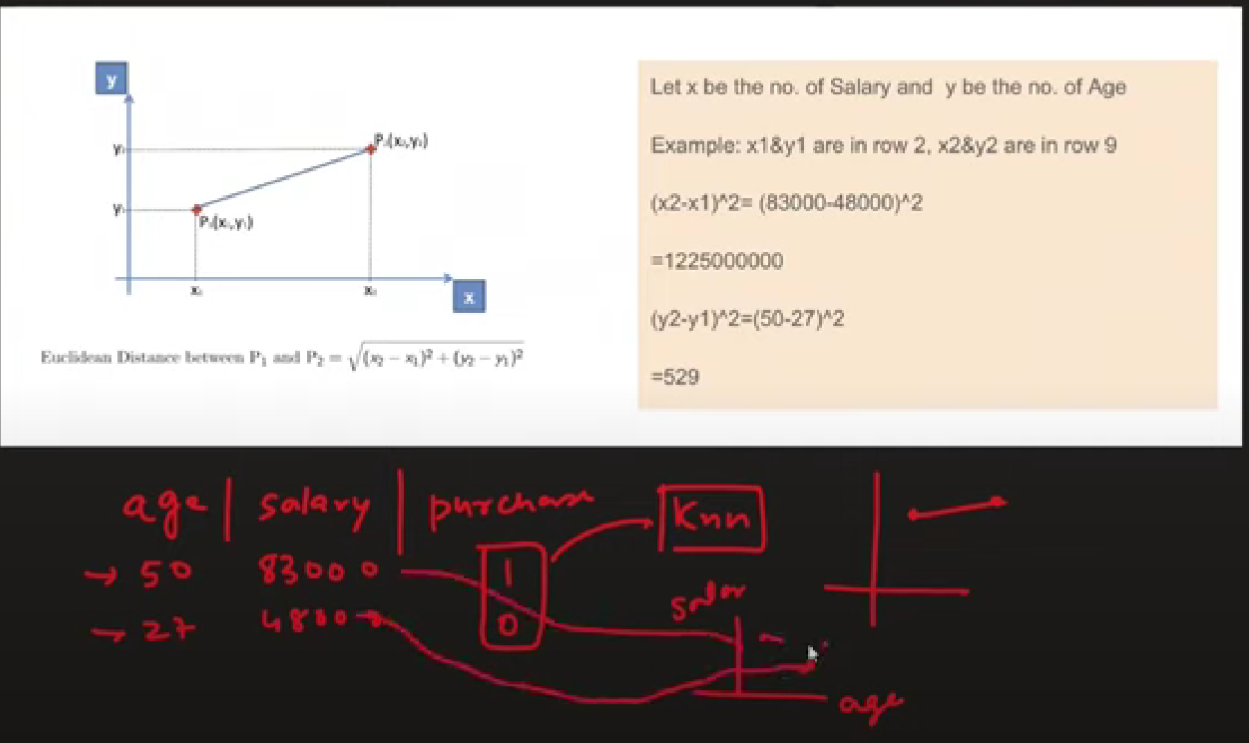


### Types of Feature Scaling:
 - Standardization
 - Normalisation

### Standardadization - Intution
Standardization is also called a Z-Score Normalisation.


#### How to standardize?
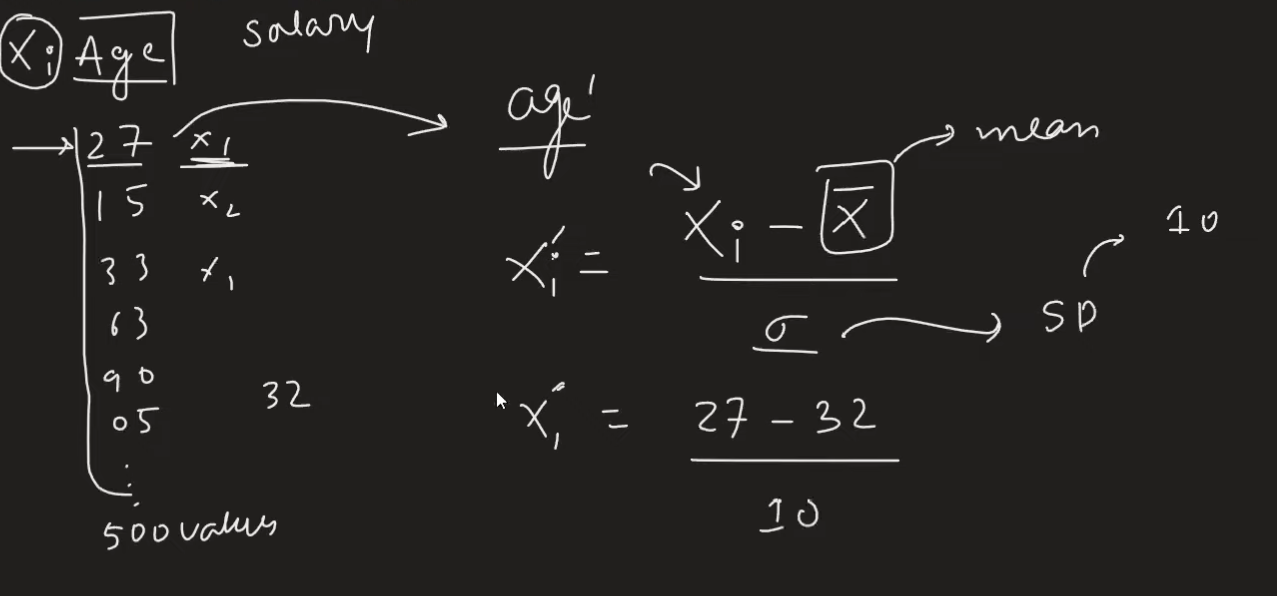
<br>

for the values so calculated,  the good part is that for all of them the mean will be equal to 0 and the SD will be 1.


### What is the Geometric Inference of it?
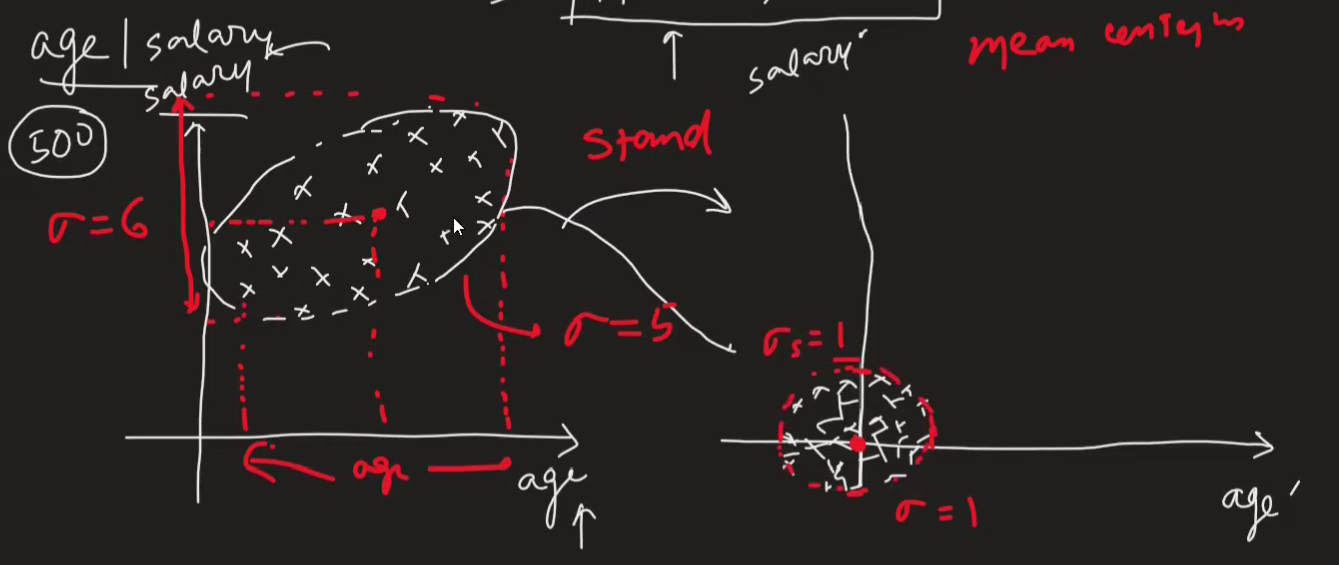<br>
SD k terms me scale kr rhe ho, and mean k terms me centering kar rhe ho.


### An example to understand the Standardization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('Social_Network_Ads.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
364,15654456,Male,42,104000,1
108,15720943,Male,26,86000,0
386,15724150,Female,49,39000,1
361,15778830,Female,53,34000,1


In [5]:
#removing unwanted columns
df=df.iloc[:,2:]

In [7]:
df.sample(5)

,Age,EstimatedSalary,Purchased
204,58,101000,1
378,41,87000,1
164,33,69000,0
158,26,30000,0
329,47,107000,1


In [8]:
#whenever we need to perform feature scaling, we should always perform feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [9]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train) #training data se seekh liya isne, ab test data pe apply karenge

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [13]:
#since it is a numpy array, we will convert it into dataframe
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [15]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [16]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect of training

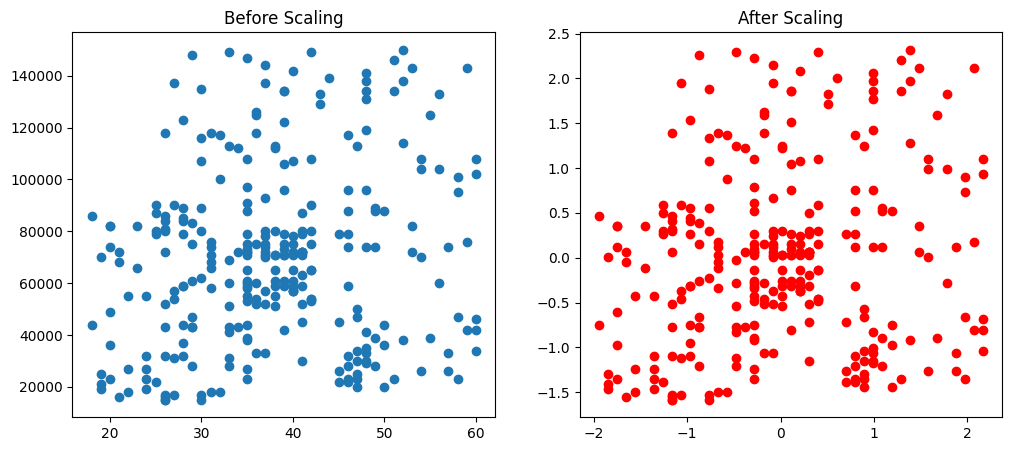

In [20]:
# the above graphs show that the distribution of the data is maintained, but the values are different, the shape is maintained
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

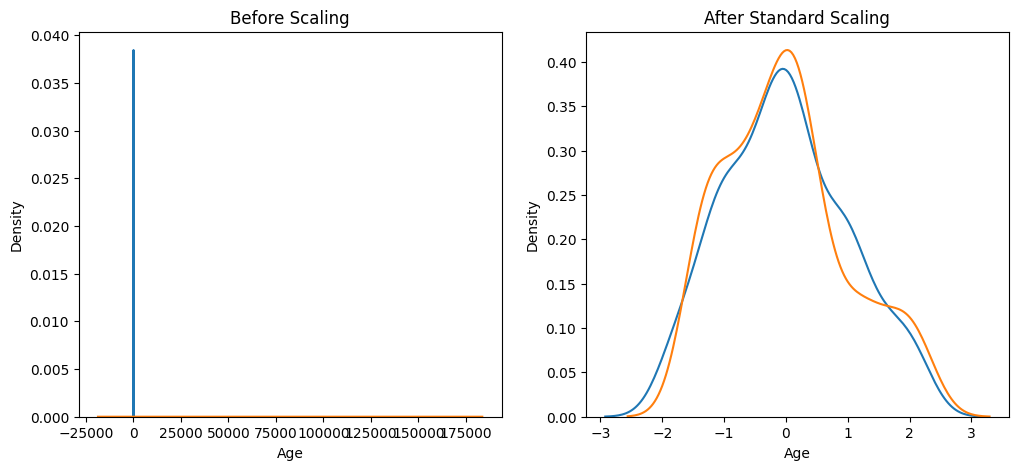

In [21]:
#the first plot shows that there is no comparasions between the two attributes, and that is why we need to scale the data, so that we can compare the two attributes. The second plot shows that the data is scaled and now we can compare the two attributes!
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

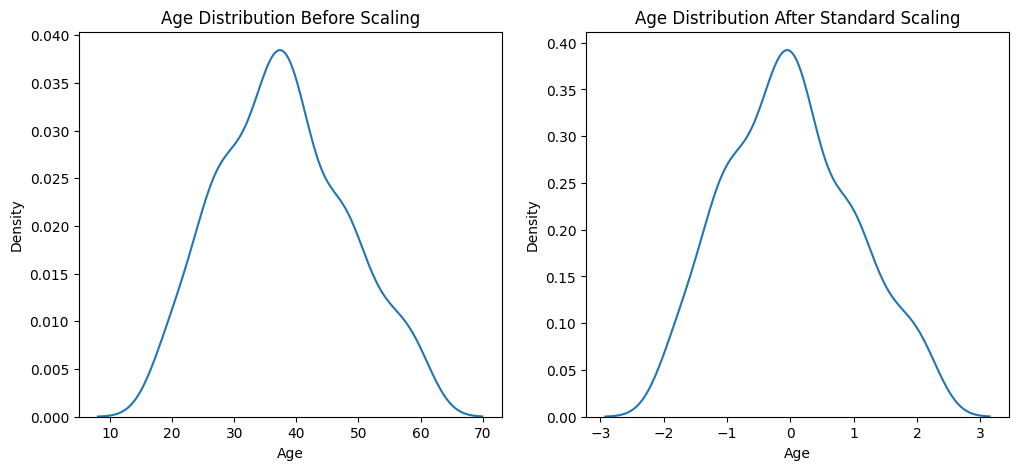

In [23]:
# Comparasions of Data
#the following plot shows that the distribution of the data is maintained, but the values are different, the shape is maintained.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

### Why scaling is important!?

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [26]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score

In [31]:
print('Accuracy before scaling', accuracy_score(y_test, y_pred))
print('Accuracy after scaling', accuracy_score(y_test, y_pred_scaled))

Accuracy before scaling 0.6583333333333333
Accuracy after scaling 0.8666666666666667


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [34]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [36]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### EFFECT OF OUTLIER


In [41]:
df = pd.DataFrame()
df = df.append(pd.DataFrame({'Age': [5, 90, 95],
                              'EstimatedSalary': [1000, 250000, 350000],
                              'Purchased': [0, 1, 1]}), ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

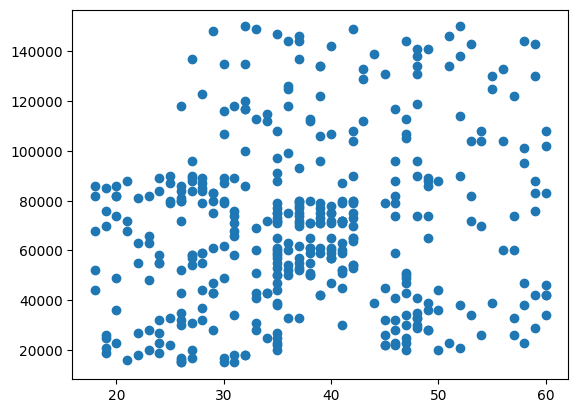

In [38]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

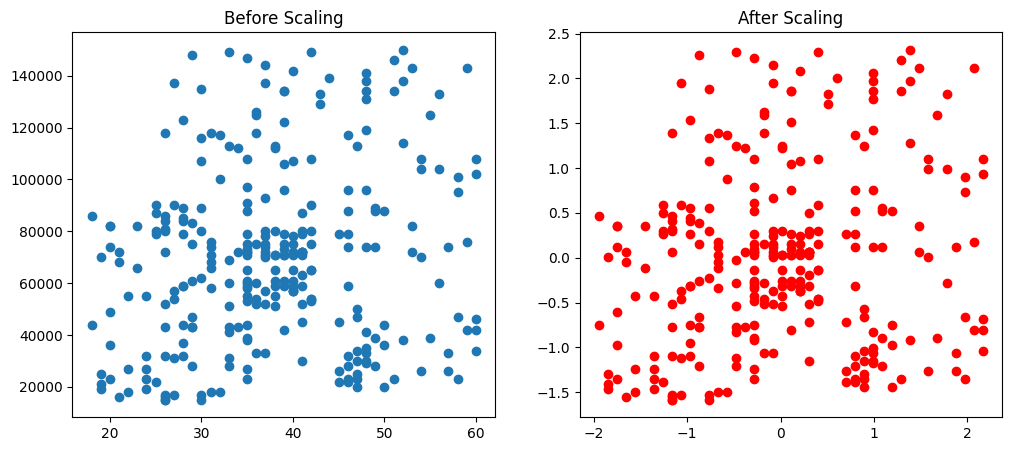

In [44]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [45]:
# so long story short, it doesn't matter if the data is standardised or not, the outliers remain unaffected, as they are also scaled!


### When to apply the standardisation?
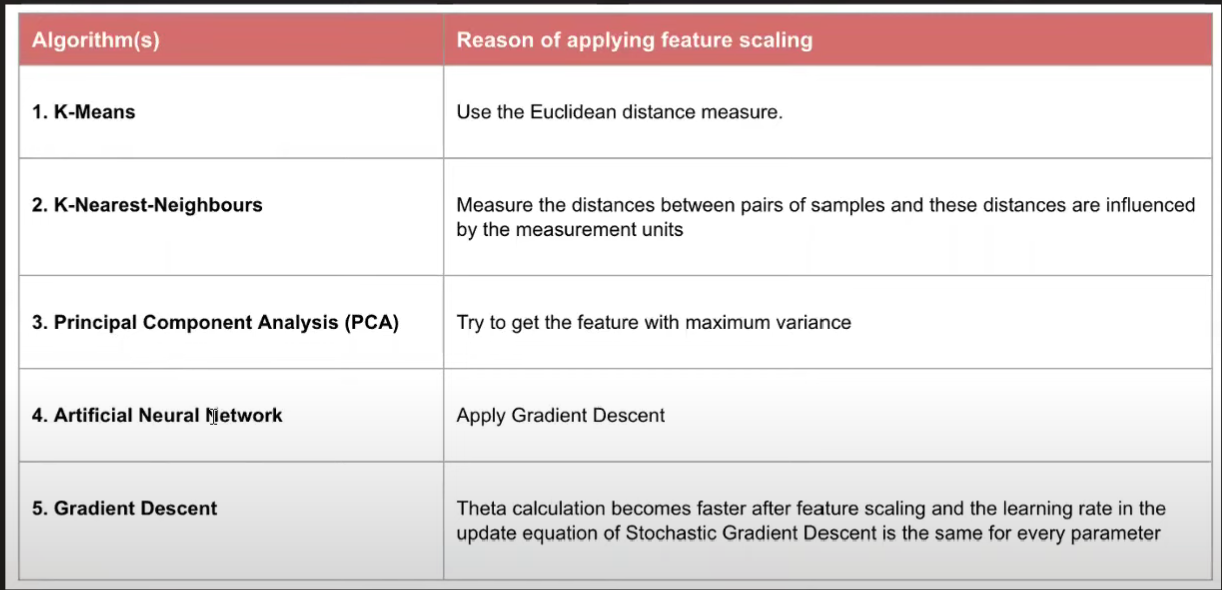<br>
and when not to use standardisation, when your problem includes algorithms like:
- Decision Trees
- Random Forest
- Gradient Boost
- XG Boost
